In [1]:
# import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* age
* sex
* cp : chest pain type (4 values)
* trestbps : resting blood pressure
* chol : serum cholestoral in mg/dl
* fbs : fasting blood sugar > 120 mg/dl
* restecg : resting electrocardiographic results (values 0,1,2)
* thalach : maximum heart rate achieved
* exang : exercise induced angina
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There are no null values. Most of the columns are integer and there is one column which data type is float.

In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values.

In [6]:
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

The distribution of target 1 and 0 are almost similar

1 -> Defective Heart

0 -> Healthy

In [8]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape)

(820, 13) (205, 13) (820,)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

#### 1. Logistic Regression Model

In [12]:
model_lr = LogisticRegression()

param_grid = {
    'solver': ['liblinear', 'saga'],
    'C': np.logspace(0,10,1),
    'penalty' : ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(model_lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# the best SVM model
best_lr_model = grid_search.best_estimator_

# Predict using the best model
y_pred = grid_search.predict(X_test)

# Print the best params and evaluate the predictions
print("Best hyperparameter:", grid_search.best_params_)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy score of the test data:", accuracy_lr)

Best hyperparameter: {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score of the test data: 0.8048780487804879


In [13]:
best_lr_model.coef_

array([[-0.12168011, -0.80343309,  0.81149764, -0.25239848, -0.2654297 ,
         0.01006047,  0.14876707,  0.59224713, -0.54898164, -0.60254006,
         0.30635769, -0.78429477, -0.60853713]])

In [14]:
coefs = pd.Series(index=X.columns, data=best_lr_model.coef_[0])
sorted_coefs = coefs.sort_values(ascending=True)

C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

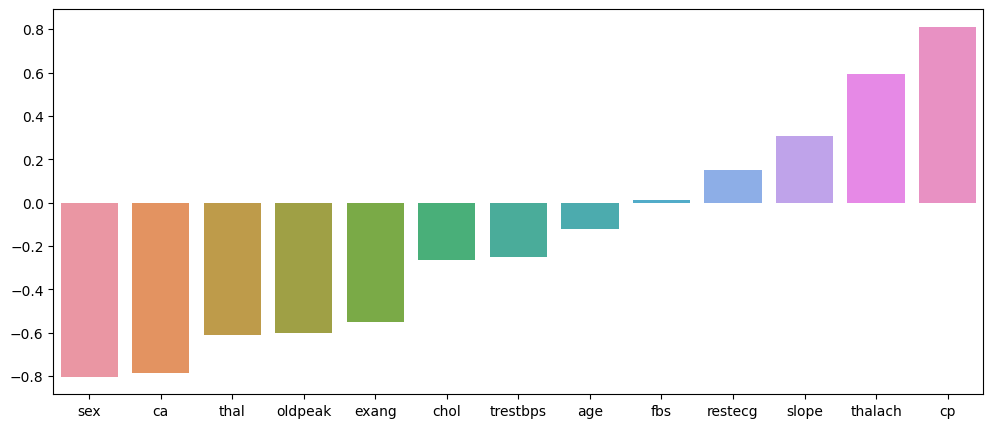

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(x=sorted_coefs.index, y=sorted_coefs.values)

#### 2. Decision Tree Classifier

In [16]:
model_dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(model_dt, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# the best SVM model
best_dt_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_dt_model.predict(X_test)

# Print the best params and evaluate the predictions
print("Best hyperparameter:", grid_search.best_params_)
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy score of the test data:", accuracy_dt)

Best hyperparameter: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy score of the test data: 0.9317073170731708


In [17]:
accuracy_dict = {'Logistic Regression': accuracy_lr,
                 'Decision Tree Classifier': accuracy_dt}

df = pd.DataFrame(list(accuracy_dict.items()), columns=['Classifier', 'Accuracy'])
print(df)

                 Classifier  Accuracy
0       Logistic Regression  0.804878
1  Decision Tree Classifier  0.931707


In [18]:
# Find the classifier with the highest accuracy
best_classifier = df[df['Accuracy'] == df['Accuracy'].max()]['Classifier'].values[0]
best_accuracy = df['Accuracy'].max()

print("Classifier with the highest accuracy:")
print(f"Classifier: {best_classifier}")
print(f"Accuracy: {best_accuracy}")

Classifier with the highest accuracy:
Classifier: Decision Tree Classifier
Accuracy: 0.9317073170731708


### Building a predictive system

In [19]:
input_data =(64,1,0,128,263,0,1,105,1,0.2,1,1,3)

# changing the input data into numpy array
input_date_as_np_array = np.array(input_data)

#  reshape the array 
input_data_reshape = input_date_as_np_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshape)

prediction = best_dt_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have Heart's disease")
else:
    print("The person has Heart's disease")

[1]
The person has Heart's disease


C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Saving the trained model

In [20]:
filename = 'HeartDiseasemodel.sav'
scaler_heart_filename = "HeartDiseaseScaler.sav"
pickle.dump(best_dt_model, open(filename, 'wb'))
pickle.dump(scaler, open(scaler_heart_filename, 'wb'))

In [21]:
# loading the saved model
loaded_model = pickle.load(open('HeartDiseasemodel.sav','rb'))
loaded_scaler = pickle.load(open('HeartDiseaseScaler.sav','rb'))

In [22]:
input_data =(64,1,0,128,263,0,1,105,1,0.2,1,1,3)

# changing the input data into numpy array
input_date_as_np_array = np.array(input_data)

#  reshape the array 
input_data_reshape = input_date_as_np_array.reshape(1,-1)

# standardize the data
std_data = loaded_scaler.transform(input_data_reshape)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have Heart's disease")
else:
    print("The person has Heart's disease")

[1]
The person has Heart's disease


C:\Users\6917\.conda\envs\MachineLearningEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
for x in X.columns:
    print (x)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
